# Probability

## Sampling Densities
First, we sample from the normal distribution $\mathcal{N}(0., 1.)$

In [1]:
from numpy.random import normal

N = 1000 # Number of samples to take
samples = normal(size=N)

Then, we plot the histogram of samples:

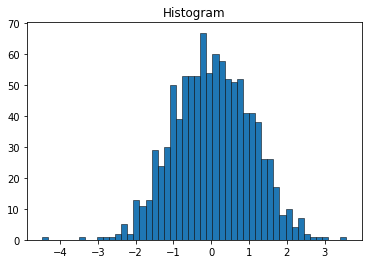

In [2]:
%matplotlib inline

from matplotlib import pyplot as plt

BINS = 50
plt.hist(samples, bins=BINS, edgecolor="black", linewidth=.5)
plt.title("Histogram")
plt.show()

Now let us compare the reference Guassian:

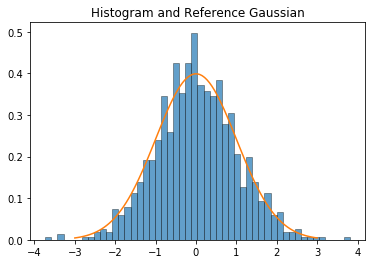

In [5]:
from numpy import linspace
from scipy.stats import norm

x = linspace(-3., 3., 100)
gaussian = norm.pdf(x)

plt.hist(samples, bins=BINS, density=True, alpha=.7, edgecolor="black", linewidth=.5)
plt.plot(x, gaussian)
plt.title("Histogram and Reference Gaussian")
plt.show()

Now we draw the histogram of $y_i = e_i^x$ where $x_i \in \mathcal{N}(0., 1.)$

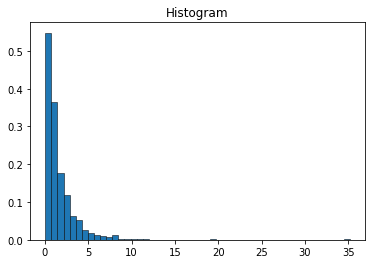

In [3]:
from numpy import exp

# Compute the transformation
samples = normal(size=N)
transformed_samples = exp(samples)

# Draw the histogram
plt.hist(transformed_samples, bins=BINS, density=True, edgecolor="black", linewidth=.5)
plt.title("Histogram")
plt.show()

## Transformation on a Random Variable
We wish to sample transform samples $x \sim \mathcal{U}(0., 1.)$ to the Cauchy density:
$$ Y = p(x) = \frac{1}{\pi (1 + x^2)} $$

The Cauchy distribution is given as:
$$ \int_{-\infty}^x \frac{1}{\pi (1 + t^2)} dt = \frac{1}{\pi} \int_{-\infty}^x \frac{1}{1 + t^2} = \frac{1}{\pi} \left[ \tan^{-1} t \right]_{-\infty}^x = \frac{1}{\pi} \tan^{-1}x + \frac{1}{2} $$

Hence using the CDF transformation technique:
$$ P_Y(y) = \mu(Y \leq y) = \mu \left( \frac{1}{\pi} \tan^{-1} X + \frac{1}{2} \leq y \right) = \mu \left( X \leq \tan ( \pi (y - \frac{1}{2} ) ) \right) $$

But since $X \sim \mathcal{U}(0., 1.)$, we know that:
$$ P_X(x) = \mu(X \leq x) = \int 1 dt = x $$

Hence:
$$ \mu \left( X \leq \tan ( \pi (y - \frac{1}{2} ) ) \right) = \tan \left( \pi (y - \frac{1}{2} ) \right) $$

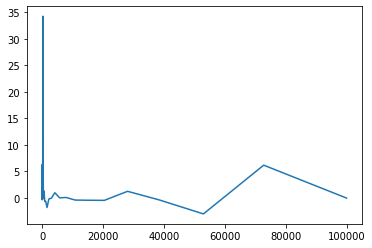

In [4]:
from numpy import mean, int32, logspace, pi, tan
from numpy.random import uniform

def generate_cauchy_density (size):
    # Draw uniform samples
    samples = uniform(size=size)
    # Transform to Cauchy density
    return tan(pi * (samples - .5))

# Plot sample count vs. mean
N = 30
sizes = logspace(1., 5., num=N, dtype=int32)
means = [mean(generate_cauchy_density(size)) for size in sizes]

# Plot
plt.plot(sizes, means)
plt.show()